# This notebook analyzes FVS benchmark training time results and produces various graphics

In [1]:
#
# Imports
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#
# Plot training time
# 

def plot_training_time(data, query):
    
    fp = 'results/benchmarks-deep{}M-q{}.csv'.format(data, query)
    
    # read in benchmark
    df = pd.read_csv(fp)
    df['train_delta'] = df['ts_train_end'] - df['ts_train_start']
    
    # only need these two columns for plotting
    new_df = df[['bits', 'train_delta']]

    # mean training delta
    mu = new_df.groupby('bits')['train_delta'].mean().to_frame().reset_index()
        
    # title of plot
    title = 'Index Build/Train Time for {}M of Deep 1B'.format(data)
    xlabel = 'size of trained vector in bits'
    ylabel = 'Index build/train time (seconds)'
    plot_file = 'results/deep1B_{}_train_time.png'.format(data)
    
    # plot
    sns.lmplot(x='bits', y='train_delta', data=new_df, hue='bits', fit_reg=False, legend=False, markers='X')
    sns.lineplot(x='bits', y='train_delta', data=mu, color='.3')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(plot_file, bbox_inches='tight')
    print("Saved plot", plot_file)
    
    

Saved plot results/deep1B_1_train_time.png
Saved plot results/deep1B_2_train_time.png
Saved plot results/deep1B_5_train_time.png
Saved plot results/deep1B_10_train_time.png
Saved plot results/deep1B_20_train_time.png
Saved plot results/deep1B_50_train_time.png


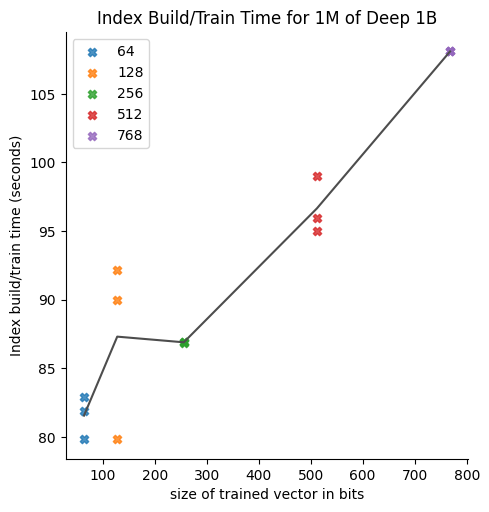

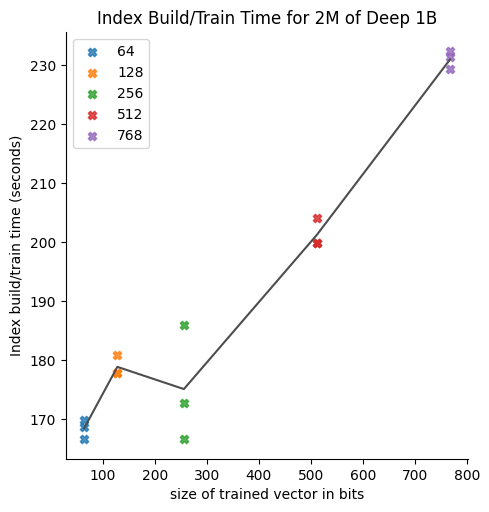

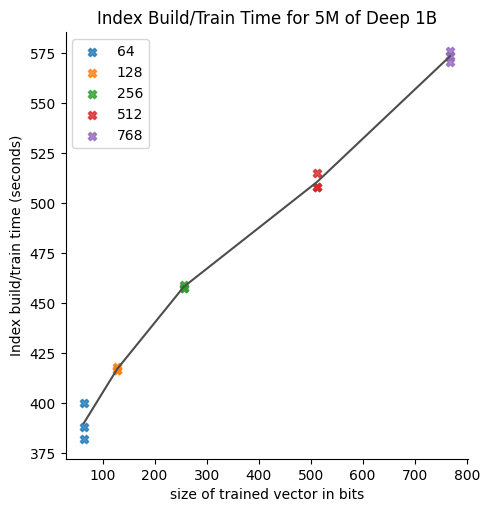

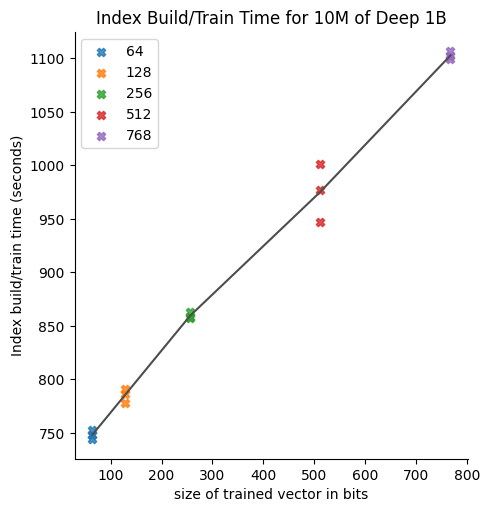

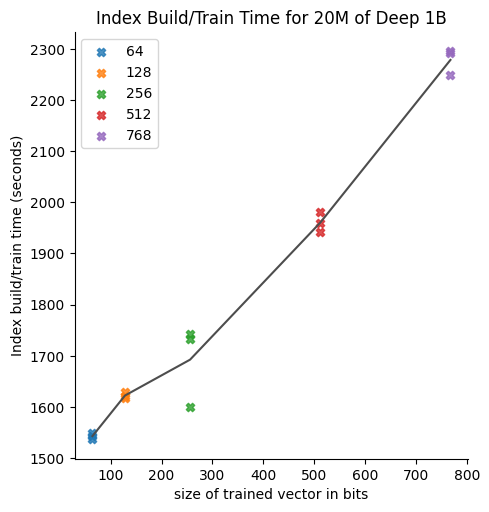

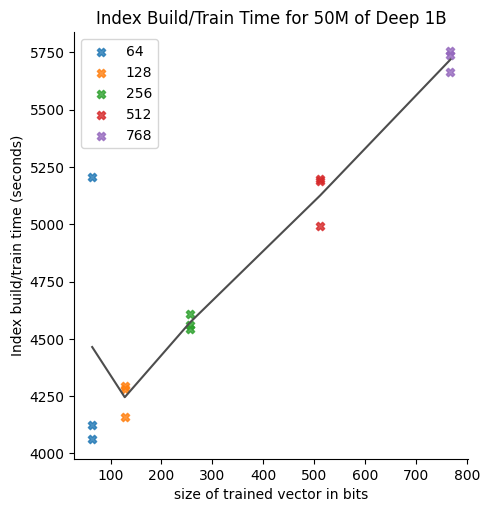

In [6]:
data = [1, 2, 5, 10, 20, 50]

for i in data:
    plot_training_time(i, 10) 
    